In [31]:
# ================================================================================ #
# =========================== Goolge Colab File Upload =========================== #
# ================================================================================ #

from google.colab import drive
drive.mount('/content/drive')

from google.colab import output
# !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
!cp "/content/drive/MyDrive/Colab Notebooks/2021 빅데이터 통신 플랫폼 경진대회/datasets/datasets.zip" "datasets.zip"
# data.zip을 현재 디렉터리에 압축해제
!unzip "datasets.zip"
!unzip "covid_19_dataset.zip"
!unzip "KT_빅데이터플랫폼_데이터셋.zip"

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

output.clear()

In [1]:
!dir

Case.csv			PatientInfo.csv    StartupOrClosing_Region.csv
covid_19_dataset.zip		Policy.csv	   StartupOrClosing_Shop.csv
datasets.zip			popl.csv	   TimeAge.csv
dlvr_call.csv			Region.csv	   Time.csv
drive				sample_data	   TimeGender.csv
전체\ 데이터\ 설명.hwp		SearchTrend.csv    TimeProvince.csv
KT_빅데이터플랫폼_데이터셋.zip	SeoulFloating.csv  Weather.csv


In [3]:
# import library
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm, tqdm_notebook

# csv file download
csv_dir_lst = glob.glob('./*.csv');
df_dict = {}

for dir in tqdm_notebook(csv_dir_lst):
    filename = dir.split("./")[1].split(".")[0]

    try:
        df = pd.read_csv(dir)
    except:
        print("{} : encoding error!", filename)
        df = pd.read_csv(dir, encoding = 'cp949')

    df_dict[filename] = df.copy(...)

    del df

print(df_dict.keys())

df_Policy = df_dict["Policy"]
df_TimeAge = df_dict["TimeAge"]
df_TimeGender = df_dict["TimeGender"]
df_dlvr_call = df_dict["dlvr_call"]
df_Time = df_dict["Time"]
df_Weather = df_dict["Weather"]
df_StartupOrClosing_Region = df_dict["StartupOrClosing_Region"]
df_TimeProvince = df_dict["TimeProvince"]
df_PatientInfo = df_dict["PatientInfo"]
df_Case = df_dict["Case"]
df_popl = df_dict["popl"]
df_Region = df_dict["Region"]
df_StartupOrClosing_Shop = df_dict['StartupOrClosing_Shop']
df_SeoulFloating = df_dict['SeoulFloating'], 
df_SearchTrend = df_dict['SearchTrend']


from google.colab import output
output.clear()

In [4]:
# 접근 1. 시계열 성분에 따른 분석
# 일별, 주별, 월별 그래프
# 이후 증감율을 박스 플롯 형태로 그리기
# 전체 인구 대비 월별 그리고 연령별 비율을 원형 그래프로 비교하기
print("\n# df_TimeAge headline #\n")
print(df_TimeAge.head())

# groupby date and age
TimeAge_group = df_TimeAge.groupby(by = ["date", "age"]).sum()
print("\n# df_TimeAge grouped by date and age #\n")
print(TimeAge_group.head())


# df_TimeAge headline #

         date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

# df_TimeAge grouped by date and age #

                time  confirmed  deceased
date       age                           
2020-03-02 0s      0         32         0
           10s     0        169         0
           20s     0       1235         0
           30s     0        506         1
           40s     0        633         1


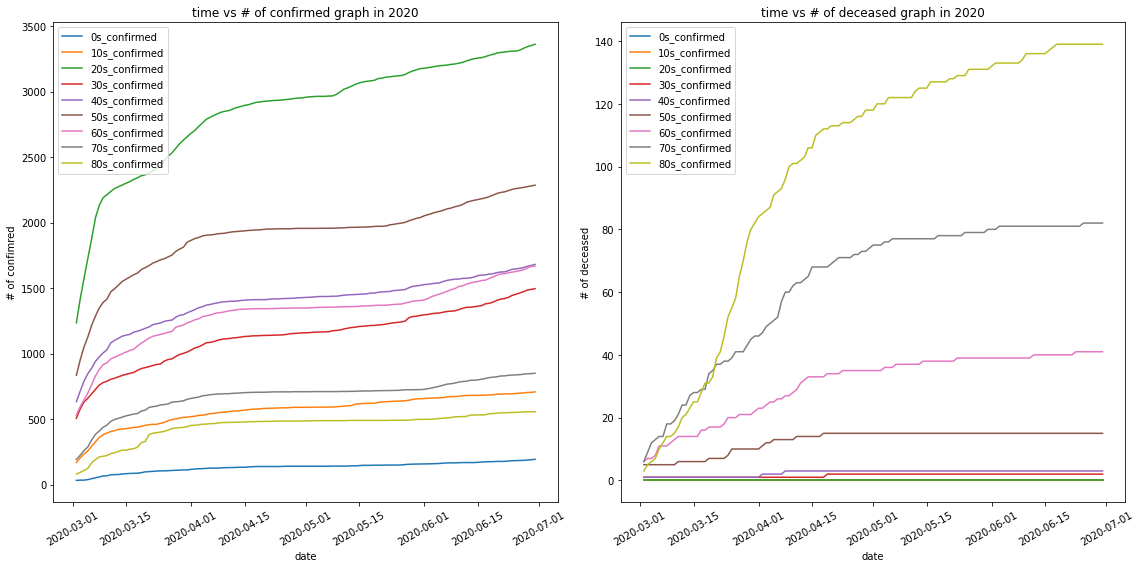

In [5]:
TimeAge_group_age = df_TimeAge.groupby(by = ["age"])
TimeAge_dict = {}

for key, group in TimeAge_group_age:
    #print("*key : ", key)
    #print("*group : ", group.head())
    #print('\n')

    if 'date' not in TimeAge_dict.keys():
        TimeAge_dict['date'] = group['date'].values

    TimeAge_dict[key + "_confirmed"] = group["confirmed"].values
    TimeAge_dict[key + "_deceased"] = group["deceased"].values

TimeAge_group_age = pd.DataFrame.from_dict(TimeAge_dict)
TimeAge_group_age['date'] = pd.to_datetime(TimeAge_group_age['date'])

# plot the time vs # of confirmed / time vs # of deceased depending on age variable

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
age_lst = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']
ax1.set_title("time vs # of confirmed graph in 2020")
ax2.set_title("time vs # of deceased graph in 2020")

x_label = TimeAge_group_age["date"].map(lambda x : x.date())

for age in age_lst:
    ax1.plot(x_label, TimeAge_group_age[age + "_confirmed"], label = age + "_confirmed")
    ax2.plot(x_label, TimeAge_group_age[age + "_deceased"], label = age + "_confirmed")

ax1.set_xlabel('date')
ax2.set_xlabel('date')
ax1.set_ylabel('# of confimred')
ax2.set_ylabel('# of deceased')

ax1.legend()
ax2.legend()
ax1.tick_params(axis = 'x', rotation = 30)
ax2.tick_params(axis = 'x', rotation = 30)
fig.tight_layout()
plt.show()

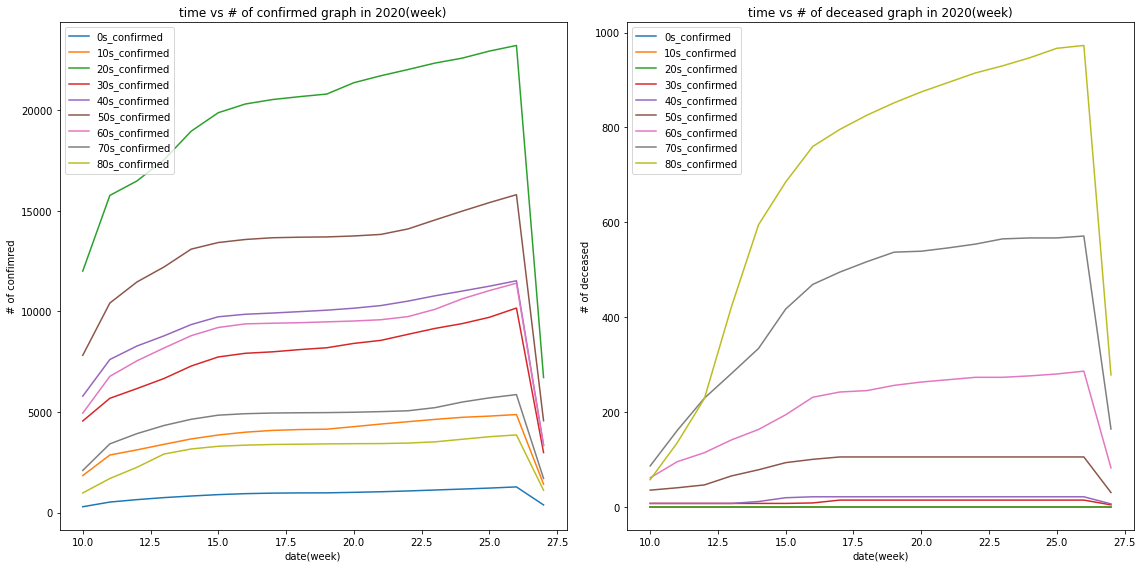

In [6]:
# 요일별, 주별, 월별 추이 관찰
TimeAge_group_age_week, TimeAge_group_age_month = TimeAge_group_age.copy(...), TimeAge_group_age.copy(...)
TimeAge_group_age_week['date'] = TimeAge_group_age_week['date'].map(lambda x : x.week)
TimeAge_group_age_month['date'] = TimeAge_group_age_month['date'].map(lambda x : x.month)

week_labels = TimeAge_group_age_week.groupby('date').groups.keys()
month_labels = TimeAge_group_age_month.groupby('date').groups.keys()

TimeAge_group_age_week = TimeAge_group_age_week.groupby('date').sum()
TimeAge_group_age_month = TimeAge_group_age_month.groupby('date').sum()

#TimeAge_group_age_week.head()
#TimeAge_group_age_month.head()

# plot the time vs # of confirmed / time vs # of deceased depending on age variable
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
age_lst = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']
ax1.set_title("time vs # of confirmed graph in 2020(week)")
ax2.set_title("time vs # of deceased graph in 2020(week)")

x_week = np.fromiter(week_labels, dtype = int)

for age in age_lst:
    ax1.plot(x_week, TimeAge_group_age_week[age + "_confirmed"], label = age + "_confirmed")
    ax2.plot(x_week, TimeAge_group_age_week[age + "_deceased"], label = age + "_confirmed")

ax1.set_xlabel('date(week)')
ax2.set_xlabel('date(week)')
ax1.set_ylabel('# of confimred')
ax2.set_ylabel('# of deceased')

ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

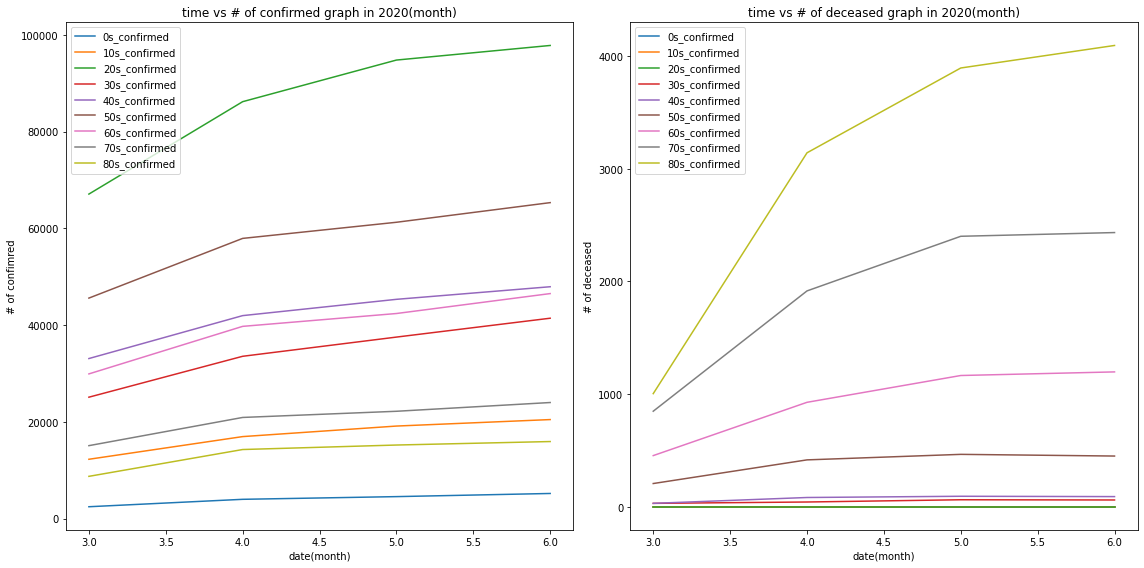

In [7]:
# plot the time vs # of confirmed / time vs # of deceased depending on age variable
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
age_lst = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']
ax1.set_title("time vs # of confirmed graph in 2020(month)")
ax2.set_title("time vs # of deceased graph in 2020(month)")

x_month = np.fromiter(month_labels, dtype = int)

for age in age_lst:
    ax1.plot(x_month, TimeAge_group_age_month[age + "_confirmed"], label = age + "_confirmed")
    ax2.plot(x_month, TimeAge_group_age_month[age + "_deceased"], label = age + "_confirmed")

ax1.set_xlabel('date(month)')
ax2.set_xlabel('date(month)')
ax1.set_ylabel('# of confimred')
ax2.set_ylabel('# of deceased')

ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [60]:
df_Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [9]:
df_TimeGender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [10]:
df_dlvr_call.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [11]:

df_popl.head()

,base_ymd,ori_table,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,local_pop,fore_pop_1,fore_pop_2
0,20200212,2,F,age_50,11110515,205,0,0,NaN
1,20200212,2,F,age_15,11110515,78,0,0,NaN
2,20200212,21,F,age_10,11110515,28,0,0,NaN
3,20200212,7,F,age_10,11110515,49,0,0,NaN
4,20200212,16,M,age_25,11110515,291,0,0,NaN


# startuporclosing_region #


,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
0,1,20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
1,2,20200101,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
2,3,20200101,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
3,4,20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
4,5,20200101,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1


No handles with labels found to put in legend.



창업 분야 수:  3006
전체 데이터 수:  87855


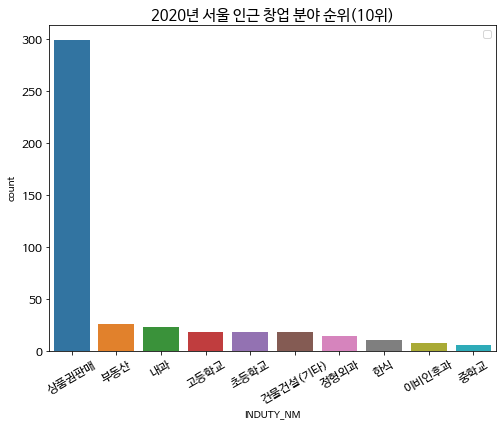

In [32]:
print("# startuporclosing_region #")
display(df_StartupOrClosing_Region.head())

induty_nm = np.unique(df_StartupOrClosing_Region['INDUTY_NM'].values)
print("\n창업 분야 수: ", len(induty_nm))
print('전체 데이터 수: ', len(df_StartupOrClosing_Region))
#startupOrClosing_Region_group = df_StartupOrClosing_Region.groupby(by = ['INDUTY_NM'])

# 'DATE' : int -> convert to datetime
'''
from datetime import datetime
df_StartupOrClosing_Region['DATE'] = df_StartupOrClosing_Region['DATE'].map(lambda x : datetime.strptime(str(x), '%Y%m%d'))
'''

# 상위 10개의 분야에서 월별 창업 / 폐업 가게의 수를 지역별로 취급하자
startup_seoul = df_StartupOrClosing_Region[(df_StartupOrClosing_Region["BRTC_NM"] == "서울") & (df_StartupOrClosing_Region['DIVISION'] == 1)]
closing_seoul = df_StartupOrClosing_Region[(df_StartupOrClosing_Region["BRTC_NM"] == "서울") & (df_StartupOrClosing_Region['DIVISION'] == 0)]

# 서울 내 창/폐업 가게의 수(2020년 전일 종합)
plt.figure(1, figsize = (8,6))
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 서울 인근 창업 분야 순위(10위)', fontsize = 15)
sns.countplot(x = 'INDUTY_NM', data = startup_seoul, order = startup_seoul['INDUTY_NM'].value_counts().index[0:10])

No handles with labels found to put in legend.


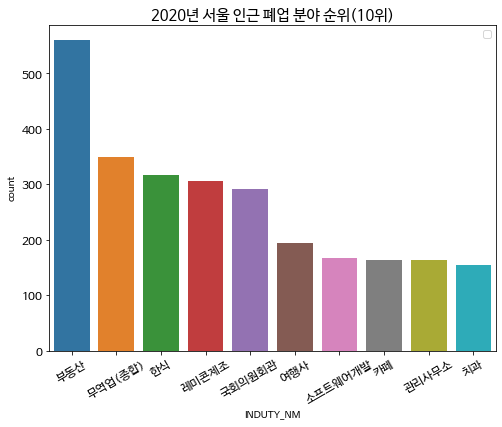

In [33]:
plt.figure(2, figsize = (8,6))
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 서울 인근 폐업 분야 순위(10위)', fontsize = 15)
sns.countplot(x = 'INDUTY_NM', data = closing_seoul, order = closing_seoul['INDUTY_NM'].value_counts().index[0:10])

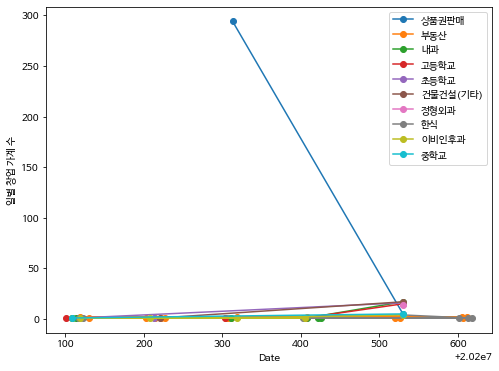

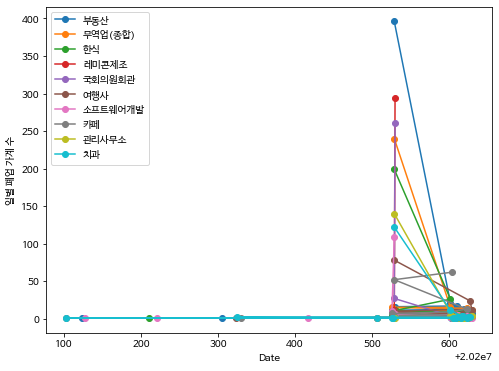

In [34]:
# 서울 내 분야별 창/폐업 가게의 수(일별 / 주별 / 월별 변화량)
startup_lst_10 = startup_seoul['INDUTY_NM'].value_counts().index[0:10]
closing_lst_10 = closing_seoul['INDUTY_NM'].value_counts().index[0:10]

startup_series = [(startup_seoul[startup_seoul['INDUTY_NM'] == l]['DATE'].value_counts().keys(), 
                   startup_seoul[startup_seoul['INDUTY_NM'] == l]['DATE'].value_counts().values) for l in startup_lst_10]

plt.figure(3, figsize = (8,6))

for (t, c), label in zip(startup_series, startup_lst_10):
    plt.plot(t,c, '-o', label = label)

plt.xlabel('Date')
plt.ylabel('일별 창업 가계 수')
plt.legend()


closing_series = [(closing_seoul[closing_seoul['INDUTY_NM'] == l]['DATE'].value_counts().keys(), 
                   closing_seoul[closing_seoul['INDUTY_NM'] == l]['DATE'].value_counts().values) for l in closing_lst_10]

plt.figure(4, figsize = (8,6))

for (t, c), label in zip(closing_series, closing_lst_10):
    plt.plot(t,c, '-o', label = label)

plt.xlabel('Date')
plt.ylabel('일별 폐업 가계 수')
plt.legend()

In [15]:
startup_seoul.head()

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
0,1,20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
40,41,20200104,인터넷쇼핑-의류,서울,중구,흥인동,37.566***,127.016***,1
48,49,20200105,무선통신업(기타),서울,구로구,구로동,37.498***,126.886***,1
50,51,20200105,보일러수리,서울,광진구,중곡동,37.567***,127.085***,1
71,72,20200108,경영상담(종합),서울,영등포구,당산동3가,37.528***,126.894***,1


In [16]:
startup_seoul['SIGUNGU_NM'].value_counts()

강남구     335
서초구      51
중구       21
영등포구     20
강서구      20
종로구      19
노원구      19
동대문구     17
구로구      16
관악구      16
강동구      14
용산구      13
송파구      13
마포구      12
성동구      12
금천구      11
광진구      10
강북구       9
동작구       9
은평구       9
성북구       8
양천구       7
서대문구      7
중랑구       5
도봉구       4
Name: SIGUNGU_NM, dtype: int64

In [17]:
startup_seoul['SIGUNGU_NM'].value_counts()['강남구']

335

In [18]:
# Install folium package for visualize position info
!pip install folium
output.clear()

# 데이터프레임 내 위도 / 경도를 숫자로 전환
startup_seoul['LA_DCMLPOINT_VALUE'] = startup_seoul.copy()['LA_DCMLPOINT_VALUE'].map(lambda text : float(text[:-3]))
startup_seoul['LO_DCMLPOINT_VALUE'] = startup_seoul.copy()['LO_DCMLPOINT_VALUE'].map(lambda text : float(text[:-3]))

# Making a map using the folium module
import folium
seoul_startup_map = folium.Map(location=[37.5502, 126.982], zoom_start = 12)

# 상위 10위권 내 창업 지역 위치 및 라벨링

local_10 = startup_seoul['SIGUNGU_NM'].value_counts().keys().values[0:10]
latlng = []

for t in local_10:
    loc = startup_seoul[startup_seoul['SIGUNGU_NM'] == t][['LA_DCMLPOINT_VALUE','LO_DCMLPOINT_VALUE']].iloc[0]
    latlng.append({'loc' : [loc[0], loc[1]], 'label' : t})
    
for t, x in zip(local_10, latlng):
    n_start = startup_seoul['SIGUNGU_NM'].value_counts()[t]
    tooltip = ('<b> - 지역: </b>' + t + '<br>' + '<b> - 창업 가게 수: </b>' + str(n_start))
    marker = folium.Marker(location = x['loc'], popup = x['label'], tooltip = tooltip)
    marker.add_to(seoul_startup_map)

seoul_startup_map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
# 창업 상위 10개 분야에 대한 각 지역별 분포를 확인한다(창업 분야에 대해 상위 5개의 지역을 선별)

seoul_startup_map_area = folium.Map(location=[37.5502, 126.982], zoom_start = 12)
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

for area, color in zip(startup_lst_10, color_list):
    area_local_5 = startup_seoul[startup_seoul["INDUTY_NM"] == area]["SIGUNGU_NM"].value_counts().keys().values[0:5]
    latlng = []

    # 위도/경도 데이터 저장
    for t in area_local_5:
        loc = startup_seoul[startup_seoul['SIGUNGU_NM'] == t][['LA_DCMLPOINT_VALUE','LO_DCMLPOINT_VALUE']].iloc[0]
        loc[0] += np.random.rand(1) * 0.02
        loc[1] += np.random.rand(1) * 0.02

        latlng.append({'loc' : [loc[0], loc[1]], 'label' : t})

    for t, x in zip(area_local_5, latlng):
        n_start = startup_seoul[startup_seoul["INDUTY_NM"] == area]["SIGUNGU_NM"].value_counts()[t]
        tooltip = ('<b> - 지역: </b>' + t + '<br>' + '<b> - 창업 가게 수: </b>' + str(n_start) + '<br>' + '<b> - 분야: </b>' + area)
        marker = folium.Marker(location = x['loc'], popup = x['label'], tooltip = tooltip, icon = folium.Icon(color = color))
        marker.add_to(seoul_startup_map_area)


seoul_startup_map_area

In [24]:
loc

LA_DCMLPOINT_VALUE     37.505
LO_DCMLPOINT_VALUE    127.062
Name: 81, dtype: float64

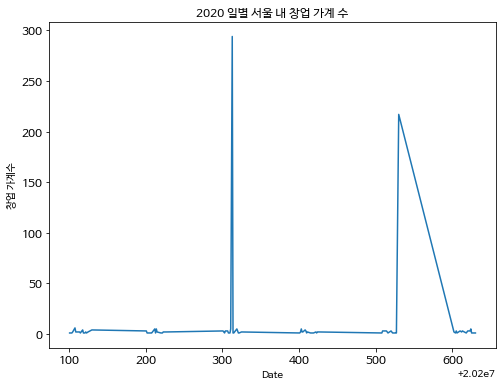

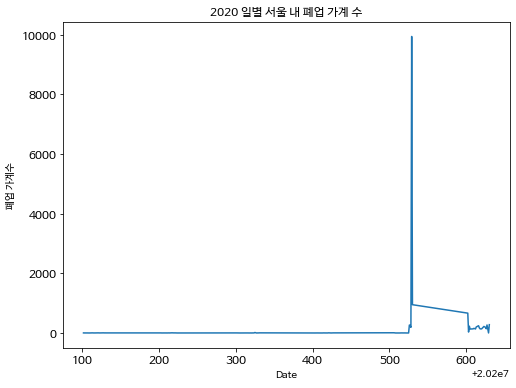

In [35]:
# 서울 내 분야 막론하고 창/폐업 가게의 수(일별 / 주별 / 월별 변화량)

# startup_seoul[startup_seoul['INDUTY_NM'].isin(startup_lst_10[1:])]['DATE'].value_counts()

plt.figure(1, figsize = (8,6))
plt.title('2020 일별 서울 내 창업 가계 수')
plt.xlabel('Date')
plt.ylabel('창업 가계수')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(startup_seoul['DATE'].value_counts().sort_index())


plt.figure(2, figsize = (8,6))
plt.title('2020 일별 서울 내 폐업 가계 수')
plt.xlabel('Date')
plt.ylabel('폐업 가계수')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(closing_seoul['DATE'].value_counts().sort_index())

No handles with labels found to put in legend.


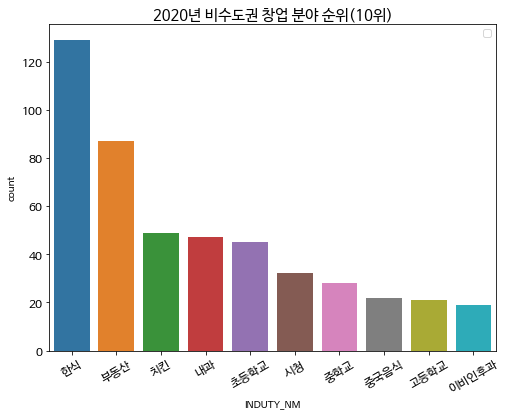

In [36]:
# 타 지역(서울 제외) 상위 10개 창/폐업 가계
startup_other = df_StartupOrClosing_Region[(df_StartupOrClosing_Region["BRTC_NM"] != "서울") & (df_StartupOrClosing_Region['DIVISION'] == 1)]
closing_other = df_StartupOrClosing_Region[(df_StartupOrClosing_Region["BRTC_NM"] != "서울") & (df_StartupOrClosing_Region['DIVISION'] == 0)]


plt.figure(1, figsize = (8,6))
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 비수도권 창업 분야 순위(10위)', fontsize = 15)
sns.countplot(x = 'INDUTY_NM', data = startup_other, order = startup_other['INDUTY_NM'].value_counts().index[0:10])

No handles with labels found to put in legend.


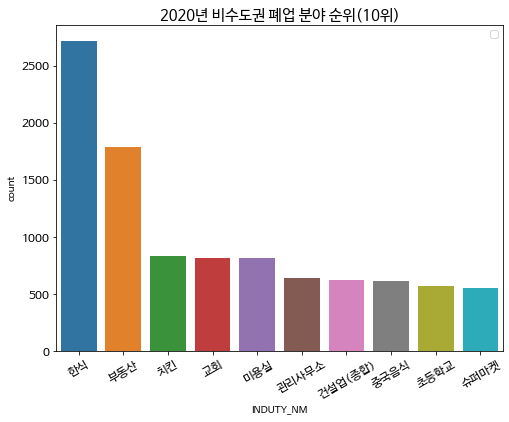

In [37]:
plt.figure(2, figsize = (8,6))
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 비수도권 폐업 분야 순위(10위)', fontsize = 15)
sns.countplot(x = 'INDUTY_NM', data = closing_other, order = closing_other['INDUTY_NM'].value_counts().index[0:10])

# startuporclosing_Shop #


,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
0,1,20200101,CCTV,(주)실라전자,319013,1
1,2,20200101,가공식품도매(기타),송현동1986발효이야기,452199,1
2,3,20200101,가구판매(종합),더갤러리전주점,571100,1
3,4,20200101,가정부.파출부소개,모두인력파출,839103,1
4,5,20200101,가정부업알선,모두인력파출,839101,1



창업 분야 수:  3425
총 상호 수:  143928
전체 데이터 수:  234232


No handles with labels found to put in legend.


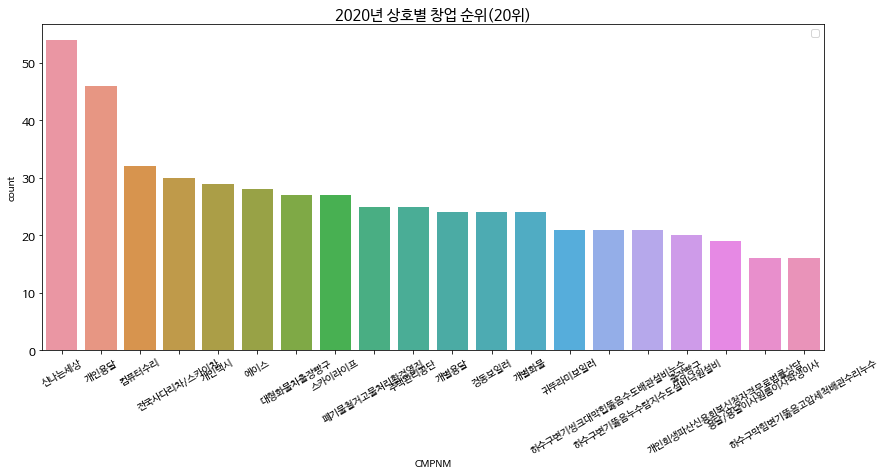

In [39]:
# 상호별 창업 / 폐업 분야 분석
print("# startuporclosing_Shop #")
display(df_StartupOrClosing_Shop.head())

induty_nm = df_StartupOrClosing_Shop['INDUTY_NM'].value_counts()
cmpnm = df_StartupOrClosing_Shop['CMPNM'].value_counts()
print("\n창업 분야 수: ", len(induty_nm))
print('총 상호 수: ', len(cmpnm))
print('전체 데이터 수: ', len(df_StartupOrClosing_Shop))


# 'DATE' : int -> convert to datetime
from datetime import datetime
df_StartupOrClosing_Shop['DATE'] = df_StartupOrClosing_Shop['DATE'].map(lambda x : datetime.strptime(str(x), '%Y%m%d'))


startup = df_StartupOrClosing_Shop[df_StartupOrClosing_Shop['division'] == 1]
closing = df_StartupOrClosing_Shop[df_StartupOrClosing_Shop['division'] == 0]

# 창업 상위 20위에 해당하는 상호 분석
plt.figure(1, figsize = (14,6))
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 상호별 창업 순위(20위)', fontsize = 15)
sns.countplot(x = 'CMPNM', data = startup, order = startup['CMPNM'].value_counts().index[0:20])

No handles with labels found to put in legend.


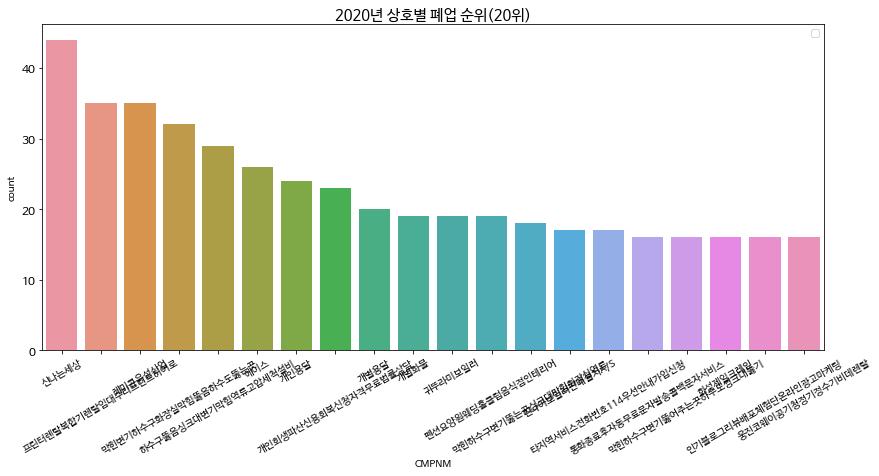

In [40]:
# 폐업 상위 20위에 해당하는 상호 분석
plt.figure(2, figsize = (14,6))
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 12)
plt.legend()
plt.title('2020년 상호별 폐업 순위(20위)', fontsize = 15)
sns.countplot(x = 'CMPNM', data = closing, order = closing['CMPNM'].value_counts().index[0:20])

In [41]:
# 창업 상위 10개 분야
startup_lst_cmpnm = startup['CMPNM'].value_counts().index[0:20]
print(startup_lst_cmpnm)


# 폐업 상위 10위에 해당하는 상호 분석

Index(['신나는세상', '개인용달', '컴퓨터수리', '전국사다리차/스카이차', '개인택시', '에이스', '대형화물차출장빵구',
       '스카이라이프', '폐기물철거고물처리환경영진', '주택관리공단', '개별용달', '경동보일러', '개별화물', '귀뚜라미보일러',
       '하수구변기씽크대막힙뚫음수도배관설비누수', '하수구변기뚫음누수탐지수도설비낙원설비', '출장빵구',
       '개인회생파산신용회복신청자격무료법률상담', '용달/용달이사원룸이사학생이사', '하수구막힘변기뚫음고압세척배관수리누수'],
      dtype='object')


In [57]:
df_Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [ ]:
# 창업 / 폐업 가게 종목 중 한식업

In [ ]:
df_PatientInfo

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [43]:
df_Region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [44]:
df_SearchTrend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [45]:
df_SeoulFloating

(               date  hour  birth_year     sex province           city  fp_num
 0        2020-01-01     0          20  female    Seoul      Dobong-gu   19140
 1        2020-01-01     0          20    male    Seoul      Dobong-gu   19950
 2        2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
 3        2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
 4        2020-01-01     0          20  female    Seoul     Dongjag-gu   28880
 ...             ...   ...         ...     ...      ...            ...     ...
 1084795  2020-05-31    21          40  female    Seoul      Dobong-gu   27620
 1084796  2020-05-31    21          40  female    Seoul      Songpa-gu   56560
 1084797  2020-05-31    21          50  female    Seoul    Gangdong-gu   38960
 1084798  2020-05-31    22          60  female    Seoul        Guro-gu   25420
 1084799  2020-05-31    23          40    male    Seoul   Eunpyeong-gu   38650
 
 [1084800 rows x 7 columns],)

In [46]:
df_popl

,base_ymd,ori_table,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,local_pop,fore_pop_1,fore_pop_2
0,20200212,2,F,age_50,11110515,205,0,0,NaN
1,20200212,2,F,age_15,11110515,78,0,0,NaN
2,20200212,21,F,age_10,11110515,28,0,0,NaN
3,20200212,7,F,age_10,11110515,49,0,0,NaN
4,20200212,16,M,age_25,11110515,291,0,0,NaN
...,...,...,...,...,...,...,...,...,...
25950440,20200518,8,M,age_25,11740700,369,0,0,NaN
25950441,20200518,0,F,age_10,11740700,104,0,0,NaN
25950442,20200518,22,M,age_25,11740700,356,0,0,NaN
25950443,20200518,18,F,age_30,11740700,306,0,0,NaN


In [47]:
df_Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [49]:
df_TimeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [50]:
df_popl

,base_ymd,ori_table,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,local_pop,fore_pop_1,fore_pop_2
0,20200212,2,F,age_50,11110515,205,0,0,NaN
1,20200212,2,F,age_15,11110515,78,0,0,NaN
2,20200212,21,F,age_10,11110515,28,0,0,NaN
3,20200212,7,F,age_10,11110515,49,0,0,NaN
4,20200212,16,M,age_25,11110515,291,0,0,NaN
...,...,...,...,...,...,...,...,...,...
25950440,20200518,8,M,age_25,11740700,369,0,0,NaN
25950441,20200518,0,F,age_10,11740700,104,0,0,NaN
25950442,20200518,22,M,age_25,11740700,356,0,0,NaN
25950443,20200518,18,F,age_30,11740700,306,0,0,NaN


In [52]:
df_popl

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [51]:
df_dlvr_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N


In [54]:
df_Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [ ]:
# 관점 1. 종목 별 창업 / 폐업 항목 비교 (지역별)
# 관점 2. 시간에 따른 창업 및 폐업 기업 항목의 수 (지역별)
# 관점 3. 지역별 창업 및 폐업 항목 비교
# 관점 4. 

In [ ]:
# 일부 데이터셋에 대해서 우선 분석
# 선형관계 분석
# 시계열성 유무로 데이터셋을 구분/분석
# coloring 등을 이용해 시간에 따른 변화 추이 분석도 용이하다